<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

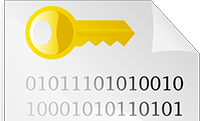

# Защита персональных данных клиентов

**Цель**
* Защитить данные клиентов страховой компании.

**Задача**
* Разработать и протестировать метод преобразования данных, чтобы по ним было сложно восстановить персональную информации.
* Проверить, что качество предсказания модели машинного обучения не ухудшится после преобразования данных.


**Описание данных**

*Признаки:*
* пол, возраст и зарплата застрахованного, количество членов его семьи.

*Целевой признак:*
* количество страховых выплат клиенту за последние 5 лет.

**Регрессия**
* В качестве метода машинного обучения была выбрана линейная регрессия.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None

from sklearn.metrics import r2_score

#Установка формата отображения данных в таблицах
pd.options.display.float_format = '{:,.2f}'.format


In [2]:
insurance = pd.read_csv('/datasets/insurance.csv') # Откроем таблицу

In [3]:
#Функция получения информации о таблице
def df_info(df):
    display(df.head())
    print()
    print('Объем таблицы', df.shape)
    print()
    print('Информация о таблице', df.info())
    print()
    
    print()
    print('Дубликаты', df.duplicated().sum())
    print()
    display(df.describe())

In [4]:
# Получим информацию о таблице
df_info(insurance)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.00,"49,600.00",1,0
1,0,46.00,"38,000.00",1,1
2,0,29.00,"21,000.00",0,0
3,0,21.00,"41,700.00",2,0
4,1,28.00,"26,100.00",0,0



Объем таблицы (5000, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
Информация о таблице None


Дубликаты 153



,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,"5,000.00","5,000.00","5,000.00","5,000.00","5,000.00"
mean,0.50,30.95,"39,916.36",1.19,0.15
std,0.50,8.44,"9,900.08",1.09,0.46
min,0.00,18.00,"5,300.00",0.00,0.00
25%,0.00,24.00,"33,300.00",0.00,0.00
50%,0.00,30.00,"40,200.00",1.00,0.00
75%,1.00,37.00,"46,600.00",2.00,0.00
max,1.00,65.00,"79,000.00",6.00,5.00


In [5]:
# Проверим процент дубликатов
insurance.duplicated().sum()/len(insurance)*100

3.06

* Более 3% дубликатов.  

* Посмотрим на распределения признаков.

Text(0.5, 1.0, 'Члены семьи')

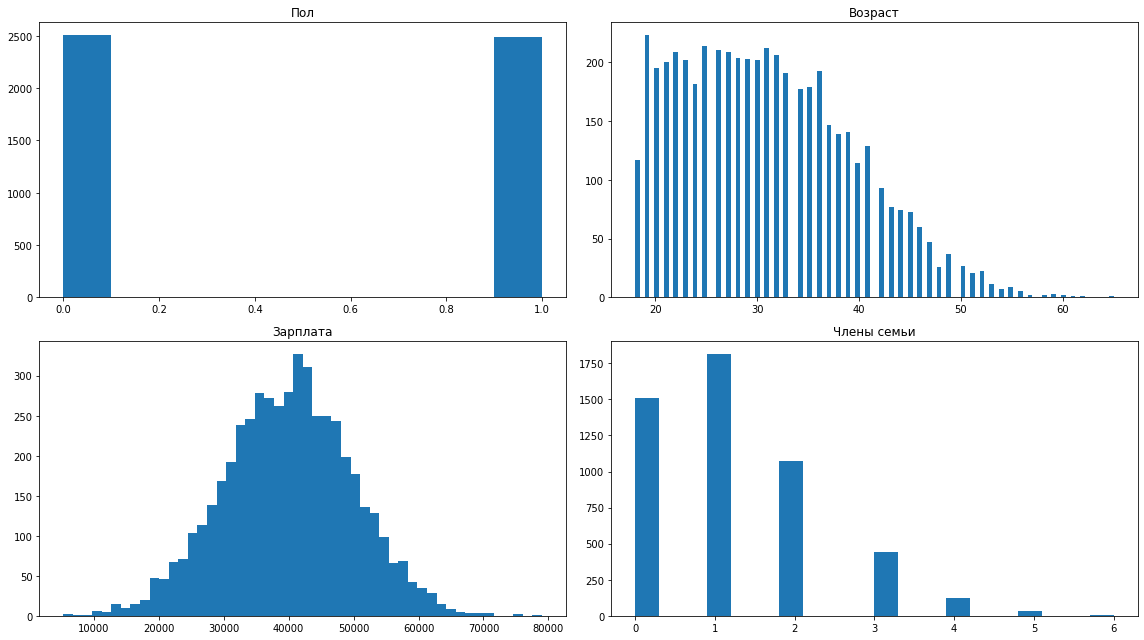

In [6]:
hist1 = insurance['Пол']
hist2 = insurance['Возраст']
hist3 = insurance['Зарплата']
hist4 = insurance['Члены семьи']
fig, axs = plt.subplots(2,2, figsize=(16,9), tight_layout=True)
axs[0,0].hist(hist1)
axs[0,0].set_title('Пол')
axs[0,1].hist(hist2, bins = 100)
axs[0,1].set_title('Возраст')
axs[1,0].hist(hist3, bins = 50)
axs[1,0].set_title('Зарплата')
axs[1,1].hist(hist4, bins=20)
axs[1,1].set_title('Члены семьи')

* Таблица `insurance` содержит 500 строк и 5 столбцов, что означает, что матрица не квадратная и применить преобразование через умножение на обратную матрицу не получится.
* Все признаки и целевой признак имеет верный формат хранения данных.
* Пропусков в таблице нет.
* Однако таблица содержит более 3% дубликатов, которые необходимо удалить.
* В таблице есть числовые и категориальные признаки. Значит перед обучением модели нужно создать дамми переменные для переменной `Члены семьи`, т.к. пол уже является дамми переменной.
* В таблице мужчины и женщины представлены в равной степени.
* Возраст клиентов в основном в диапазоне от 20 до 35. Затем количество клиентов снижается.
* Зарплата имеет нормальное распределение.
* Члены семьи в основном содержат категории 0-2, остальные категории представлены реже.

## Предобработка данных

* Удалим дубликаты из таблицы, т.к. их наличе может негативно сказаться на предсказании модели и преобразовании матриц.

In [7]:
insurance.drop_duplicates(inplace=True)
insurance.shape

(4847, 5)

In [8]:
# Создадим дамми переменные для колонки Члены семьи.
insurance_ones = pd.get_dummies(insurance, columns = ['Члены семьи'], prefix = ['Члены семьи'], drop_first=True)
insurance_ones.head()

,Пол,Возраст,Зарплата,Страховые выплаты,Члены семьи_1,Члены семьи_2,Члены семьи_3,Члены семьи_4,Члены семьи_5,Члены семьи_6
0,1,41.00,"49,600.00",0,1,0,0,0,0,0
1,0,46.00,"38,000.00",1,1,0,0,0,0,0
2,0,29.00,"21,000.00",0,0,0,0,0,0,0
3,0,21.00,"41,700.00",0,0,1,0,0,0,0
4,1,28.00,"26,100.00",0,0,0,0,0,0,0


* Масштабы между признаками различаются, значит нужно превести стандартизацию. 
* Перед этим выделим целевой и предсказательные признаки.
* Разделим выборку на тестовую и обучающую.

In [9]:
target = insurance_ones['Страховые выплаты'] # Целевой признак
features = insurance_ones.drop('Страховые выплаты', axis=1) # Матрица признаков

In [10]:
# Проверим объемы таблиц
print(target.shape)
print(features.shape)

(4847,)
(4847, 9)


* Таблица `features` с признаками теперь содержит 9 столбцов.
* Длина матриц совпадает.
* Разделим выборки.

In [11]:
features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                   test_size = 0.3, random_state = 12345)

In [12]:
data = [features_train.shape, features_test.shape, target_train.shape, target_test.shape]
index = ["features_train", "features_test", "target_train", "target_test"]
columns = ["Строки", "Столбцы"]
styles = [dict(props=[("text-align", "right"),
                   ("font-size", "120%"),
                   ("color", 'brown')])]

pd.DataFrame(data, columns = columns, index=index).fillna(0).style.set_table_styles(styles)

,Строки,Столбцы
features_train,3392,9.000000
features_test,1455,9.000000
target_train,3392,0.000000
target_test,1455,0.000000


* Выборки разделены адекватно.

In [13]:
# Стадартизируем признаки.
numeric = ['Возраст', 'Зарплата']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])


display(features_train.head(2))
print()
display(features_test.head(2))


,Пол,Возраст,Зарплата,Члены семьи_1,Члены семьи_2,Члены семьи_3,Члены семьи_4,Члены семьи_5,Члены семьи_6
2403,1,-1.06,-0.28,1,0,0,0,0,0
1647,0,1.77,0.22,0,1,0,0,0,0


,Пол,Возраст,Зарплата,Члены семьи_1,Члены семьи_2,Члены семьи_3,Члены семьи_4,Члены семьи_5,Члены семьи_6
1335,1,-0.95,0.72,0,0,0,0,0,0
3875,1,0.12,2.59,0,0,0,0,0,0


* Стандартизация прошла успешно.
* Проверим корреляцию между признаками.

<AxesSubplot:>

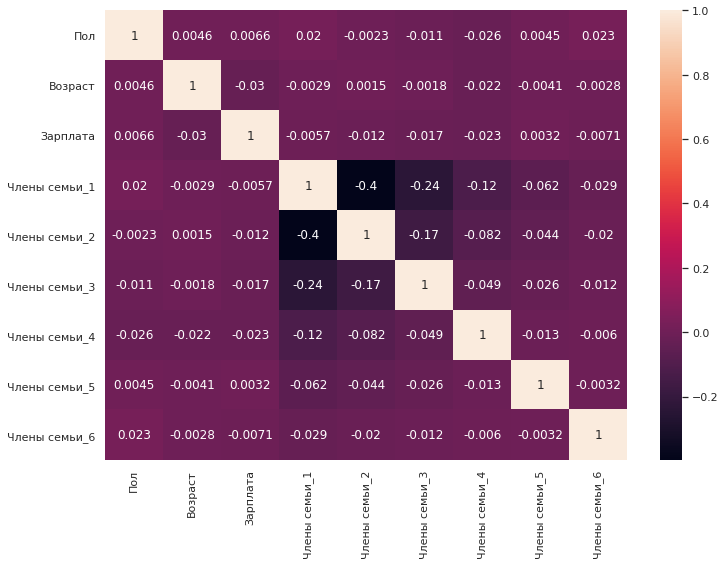

In [14]:
# Матрица корреляций
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(features_train.corr(), annot=True)


* Между признаками не обнаружено сильной (>0.8) корреляции, которая бы указывала на мультиколлиниарность признаков. Поэтому все признаки оставляем в нашей таблице.
* Извлечем векторы целевого признака из таблиц `target_train` и `target_train`
* Извлечем матрицы признаков из таблиц `features_train` и `features_test`.

### Вывод
* Созданы дамми переменные, признаки стандартизированы.
* Таблицы `features_train`, `features_test`, `target_train`, `target_test` подготовлены для преобразования матриц.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Классическое предсказание:

$$
a = Xw
$$


Предсказание с новой матрицей P:

$$
a = XPw
$$


Классическая задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$



Задача обучения с новой матрицей P:

$$
w = \arg\min_w MSE(XPw, y)
$$



Классическая формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

* В качестве метода преобразования будет протестирован шифр Хилла.



* Формула обучения с новой матрицей P:

$$
w = ((XP)^T XP)^{-1} (XP)^T y
$$

**Ответ:** 
* Создается случайная квадратная матрица P, равная по размерам: $$(X^T X)$$. 

**Обоснование:** 
* Все признаки в тренировочной и тестовой выборках будут умножены на одну и ту же случайную матрицу, которая видоизменит сырые значения матрицы признаков.
* Будет проведено сравнение вывода оценки качества линейной регрессии по $r^2$ для сырых и видоизменнных данных. В случае, если значение $r^2$ будут близкими, то метод умножения признаков на обратную матрицу будет признан удачным.

In [15]:
# Проверим размер обратной матрицы в формуле линейной регрессии
(features_train.T @ features_train).shape

(9, 9)

* Размер матрицы составил 9 на 9, значит можно создать случайную матрицу P этого размера.
* Для проверки элемента случайности, создадим несколько случайных матриц P1 и P2.

In [16]:
# Создадим случайные квадратные матрицы по размерам количества признаков и заполним нулевую колонку единицами
P1 = np.random.rand(features_train.shape[1], features_train.shape[1])
P2 = np.random.rand(features_train.shape[1], features_train.shape[1])
display(pd.DataFrame(P1))
print()
display(pd.DataFrame(P2))

,0,1,2,3,4,5,6,7,8
0,0.53,0.37,0.08,0.65,0.90,0.79,0.88,0.96,0.47
1,0.82,0.50,0.29,0.71,0.58,0.34,0.48,0.69,0.93
2,0.19,0.37,0.34,0.47,0.09,0.09,0.90,0.71,0.82
3,0.75,0.89,0.51,0.06,1.00,0.52,0.07,0.55,0.54
4,0.44,0.94,0.17,0.54,0.44,0.03,0.98,0.41,0.54
5,0.43,0.33,0.12,0.50,0.01,0.47,0.83,0.29,0.30
6,0.10,0.93,0.51,0.09,0.70,0.59,0.35,0.80,0.56
7,0.99,0.79,0.91,0.46,0.84,0.97,0.77,0.08,0.56
8,0.04,0.57,0.47,0.94,0.85,0.92,0.83,0.64,0.13


,0,1,2,3,4,5,6,7,8
0,0.10,0.84,0.38,0.44,0.04,0.99,0.33,0.57,0.58
1,0.73,0.23,0.97,0.62,0.28,0.33,0.17,0.63,0.44
2,0.23,0.18,0.10,0.36,0.87,0.12,0.61,0.88,0.09
3,0.56,0.58,0.27,0.15,0.48,0.83,0.35,0.16,0.10
4,0.27,0.71,0.40,0.64,0.40,0.52,0.34,0.27,0.21
5,0.98,0.85,0.29,0.41,0.70,0.34,0.81,0.82,0.42
6,0.82,0.34,0.64,0.47,0.39,0.28,0.55,0.09,0.70
7,0.81,0.82,0.84,0.68,0.60,0.52,0.81,0.95,0.42
8,0.89,0.49,0.13,0.76,0.83,0.28,0.89,0.64,0.23


* Матрицы P1 и P2 имеют заданный размер, но различаются друг от друга содержимым ячеек.
* Проверим обратимость новых матриц.


In [17]:
print(np.linalg.inv(P1)[1])
print(np.linalg.inv(P2)[1])

[-0.86507776  0.29234405 -1.01506462  0.07607941  0.69756932  1.00537759
  0.88935184 -0.48212306  0.09516624]
[-0.40911819 -0.3756564  -0.33938198 -0.41120448  1.62337682  1.57329855
 -0.28362819 -0.14519518 -1.13375609]


* Обе случайные матрицы обратимы.
* Умножим тренировочную и тестовую матрицы на случайные матрицы.

In [18]:
# Умножение тренировочной и тестовой выборок на случайную матрицу P1
features_train_P1 = features_train @ P1
features_test_P1 = features_test @ P1

# Умножение тренировочной и тестовой выборок на случайную матрицу P2
features_train_P2 = features_train @ P2
features_test_P2 = features_test @ P2

* Проверим можно ли вернуть сырые данные из измененных таблиц признаков через умножение на обратимую матрицу.

In [19]:
# Сырые данные
pd.DataFrame(features_train).head(3)

,Пол,Возраст,Зарплата,Члены семьи_1,Члены семьи_2,Члены семьи_3,Члены семьи_4,Члены семьи_5,Члены семьи_6
2403,1,-1.06,-0.28,1,0,0,0,0,0
1647,0,1.77,0.22,0,1,0,0,0,0
2675,0,-0.95,0.17,0,0,0,0,0,0


In [20]:
# Извлечение сырых данных за счёт умножения на обратимую матрицу
pd.DataFrame(features_train_P1.values @ np.linalg.inv(P1), columns=features.columns).head(3)

,Пол,Возраст,Зарплата,Члены семьи_1,Члены семьи_2,Члены семьи_3,Члены семьи_4,Члены семьи_5,Члены семьи_6
0,1.00,-1.06,-0.28,1.00,-0.00,0.00,-0.00,-0.00,0.00
1,0.00,1.77,0.22,-0.00,1.00,-0.00,0.00,0.00,-0.00
2,-0.00,-0.95,0.17,0.00,-0.00,0.00,-0.00,-0.00,0.00


* Матрицы совпадают.
* Теперь добавим нулевой столбец в измененные матрицы признаков для сокращения формулы линейной регрессии.

In [21]:
# Добавим нулевой столбец в признаки, чтобы сократить формулу линейной регрессии и w0 будет умножено на 1.
X_train = np.concatenate((np.ones((features_train.shape[0], 1)), features_train), axis=1)
X_train_P1 = np.concatenate((np.ones((features_train_P1.shape[0], 1)), features_train_P1), axis=1)
X_train_P2 = np.concatenate((np.ones((features_train_P2.shape[0], 1)), features_train_P2), axis=1)

* Проверим как изменяться веса. Для этого сначала посчитаем веса по классической формуле, а затем по новой формуле с умножением признаков на матрицу P.

* Создадим переменные весов `w_classic` для весов признаков с интерсептом по классической формуле и `w_pi` для измененной матрицы.
$$
w = (X^T X)^{-1} X^T y
$$


In [22]:
# Расчёт весов по классической формуле
w_classic = pd.DataFrame(np.linalg.inv(X_train.T @ X_train) @ X_train.T @ target_train)

# Расчёт весов с умножением на случайную матрицу
w_P1 = pd.DataFrame(np.linalg.inv(X_train_P1.T @ X_train_P1) @ X_train_P1.T  @ target_train)

# Посчитаем разницу весов между расчетами. Возьмем модуль, чтобы избежать разницы в знаках.
w_difference = abs(w_classic) - abs(w_P1)

In [23]:
# Построим таблицу для сравнения весов между w_classic и w_P1
(pd.concat([w_classic[1:], w_P1[1:], w_difference[1:]], 
              keys=['w_classic', 'w_P1', 'w_difference'], axis=1)
     .set_index(features.columns)
    )

,w_classic,w_P1,w_difference
,0,0,0
Пол,0.02,-0.27,-0.25
Возраст,0.30,0.00,0.30
Зарплата,0.01,-0.63,-0.62
Члены семьи_1,0.01,0.20,-0.19
Члены семьи_2,-0.01,0.17,-0.16
Члены семьи_3,-0.05,0.29,-0.24
Члены семьи_4,-0.02,-0.27,-0.25
Члены семьи_5,-0.05,-0.51,-0.46
Члены семьи_6,-0.14,0.90,-0.77


In [24]:
# Расчёт весов с умножением на случайную матрицу
w_P2 = pd.DataFrame(np.linalg.inv(X_train_P2.T @ X_train_P2) @ X_train_P2.T  @ target_train)

# Посчитаем разницу весов между расчетами. Возьмем модуль, чтобы избежать разницы в знаках.
w_difference2 = abs(w_classic) - abs(w_P2)

In [25]:
# Построим таблицу для сравнения весов между w_classic и w_P2
(pd.concat([w_classic[1:], w_P2[1:], w_difference2[1:]], 
              keys=['w_classic', 'w_P2', 'w_difference'], axis=1)
     .set_index(features.columns)
    )

,w_classic,w_P2,w_difference
,0,0,0
Пол,0.02,0.17,-0.15
Возраст,0.30,-0.05,0.25
Зарплата,0.01,0.00,0.00
Члены семьи_1,0.01,0.02,-0.01
Члены семьи_2,-0.01,0.27,-0.25
Члены семьи_3,-0.05,0.04,0.01
Члены семьи_4,-0.02,-0.78,-0.76
Члены семьи_5,-0.05,0.21,-0.16
Члены семьи_6,-0.14,0.20,-0.06


* Как видно из таблиц сравнения весов между сырыми данными и измененными данными, веса изменяются довольно сильно при умножении признаков на случайную матрицу.
* Незначимые и значимые признаки получили рандомные веса, не имеюшие отношения к реальным весам.
* Однако посмотрим на предсказания модели без и с умножением на случайную обратную матрицу.

In [26]:
# Предсказание модели по классической формуле
predict_classic = features_test.values @ w_classic.values[1:] + w_classic.values[0]

# Предсказание модели с "зашифрованными" данными, которые были помножены на матрицу P1
predict_P1 = features_test_P1.values @ w_P1.values[1:] + w_P1.values[0]

In [27]:
print('Коэффициент детерминации для сырых данных:',r2_score(target_test, predict_classic))
print('Коэффициент детерминации для измененных данных P1:', r2_score(target_test, predict_P1))

Коэффициент детерминации для сырых данных: 0.4318471370203586
Коэффициент детерминации для измененных данных P1: 0.4318471370203736


In [28]:
# Предсказание модели с "зашифрованными" данными, которые были помножены на матрицу P2
predict_P2 = features_test_P2.values @ w_P2.values[1:] + w_P2.values[0]

In [29]:
print('Коэффициент детерминации для сырых данных:',r2_score(target_test, predict_classic))
print('Коэффициент детерминации для измененных данных P2:', r2_score(target_test, predict_P2))

Коэффициент детерминации для сырых данных: 0.4318471370203586
Коэффициент детерминации для измененных данных P2: 0.43184713702038213


* Продемонстрируем как можно вернуть сырые данные.
* Выведем на экран сырые данные для тестовой выборки и отдельно выведем изменные данные, которые будут помножены на обратную матрицу.

In [30]:
# Сырые данные
pd.DataFrame(features_test).head(2)

,Пол,Возраст,Зарплата,Члены семьи_1,Члены семьи_2,Члены семьи_3,Члены семьи_4,Члены семьи_5,Члены семьи_6
1335,1,-0.95,0.72,0,0,0,0,0,0
3875,1,0.12,2.59,0,0,0,0,0,0


In [31]:
# Извлечение сырых данных из измененных данных
pd.DataFrame(features_test_P1.values @ np.linalg.inv(P1), columns = features.columns).head(2)

,Пол,Возраст,Зарплата,Члены семьи_1,Члены семьи_2,Члены семьи_3,Члены семьи_4,Члены семьи_5,Члены семьи_6
0,1.00,-0.95,0.72,0.00,-0.00,0.00,-0.00,-0.00,0.00
1,1.00,0.12,2.59,-0.00,-0.00,0.00,0.00,0.00,-0.00


* Как видно, благодаря обратимости случайной матрицы можно вернуть сырые данные.

**Вывод**
* Оценка качества модели по коэффициенту детерминации `r2` демонстирует сходство между оценками предсказания модели с сырыми и "зашифрованными" данными. 
* Элемент случайности, достигнутый генерацией двух случайных матриц `P1` и `P2`, не имеет эффекта на качество предсказания модели.
* Таким образом, данная процедура "шифрования" данных позволяет успешно без потери качества предсказывать данные целевого признака. Однако за счёт изменения данных, выявление линейных связей и вклада каждого предиктора не предоставляеться возможным. 
* Однако можно вернуть сырые данные путём умножения на обратимую матрицу.

## Алгоритм преобразования

**Алгоритм**

* Предыдущие расчёты показали, что по частям алгоритм уже успешно работает и качество модели не изменяется.
* Предлагается создать класс линейной модели и сравнить расчёты по сырым данным и по измененным.
* Если обе проверки продемонстируют схожую оценку качества предсказания модели по коэффициенту детерминации, то алгоритм будет признан удачным.
* В конце преобразований можно вернуть сырые данные путём умножения на обратимую матрицу.

**Обоснование**

* Преобразования данных позволит шифровать сырые данные и сохранять качество предсказания модели. Однако в этом случае мы потеряем смысл интерпритации данных из-за изменения весов отдельных предикторов.
* Тем не менее у нас будет ключ преобразования в виде случайной матрицы, на которую можно умножить измененные данные, чтобы вернуть сырые данные клиентов.


## Проверка алгоритма

* Создадим класс линейной модели.

In [32]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T @  X) @ X.T  @ train_target
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

* Получим предсказание модели по сырым данным.

In [33]:
model1 = LinearRegression()
model1.fit(features_train, target_train)
predictions1 = model1.predict(features_test)
print(r2_score(target_test, predictions1))

0.4318471370203586


* Предсказание совпадает с предыдущими расчётами.
* Построим теперь умножим матрицы признаков на случайные матрицы и сравним качество моделей.

In [34]:
# Получим оценку модели при умножении на случайную матрицу 1
model2 = LinearRegression()
model2.fit(features_train_P1, target_train)
predictions2 = model2.predict(features_test_P1)
print(r2_score(target_test, predictions2))

0.4318471370203736


In [35]:
# Получим оценку модели при умножении на случайную матрицу 2
model3 = LinearRegression()
model3.fit(features_train_P2, target_train)
predictions3 = model3.predict(features_test_P2)
print(r2_score(target_test, predictions3))

0.43184713702038213


* Возвратим сырые данные из видоизмененных.

In [36]:
pd.DataFrame(features_test_P2.values @ np.linalg.inv(P2), columns=features.columns).head()

,Пол,Возраст,Зарплата,Члены семьи_1,Члены семьи_2,Члены семьи_3,Члены семьи_4,Члены семьи_5,Члены семьи_6
0,1.00,-0.95,0.72,-0.00,-0.00,-0.00,0.00,-0.00,0.00
1,1.00,0.12,2.59,0.00,0.00,-0.00,0.00,0.00,0.00
2,1.00,0.23,-0.60,0.00,1.00,-0.00,0.00,-0.00,0.00
3,0.00,0.94,-2.06,0.00,1.00,0.00,0.00,-0.00,0.00
4,0.00,1.77,-1.24,0.00,1.00,-0.00,0.00,-0.00,-0.00


* Сырые данные восстановлены, благодаря наличию "ключа" - случайной матрицы.

## Вывод
* Продемонстрировано, что можно видеоизменить сырые данные клиентов путем умножения данных на случайную матрицу, что позволяет "шифровать" данные по методу Хилла.
* При этом, категориальные данные также преобразуются в числа с плавающей точкой и таким образом данные существенно видоизменяются.
* Качество предсказания модели по сырым данным и по видоизменным данным не различается, несмотря на изменение параметров данных. 
* Продемонстрировано, что можно получить сырые данные из видеоизменных по наличию "ключа" - обратной матрицы.